# What makes a playlist successful?  

In its most basic definition, a playlist becomes popular and sucessful when it is listened to more than once, by the most amount of users, as completley as possible. 

With over 200 million monthly active users spanning over 70 countries, Spotify's reach and ability to understand and connect to its users has grown exponentially.  Spotiy's playlists, including, but not limited to, genre-specific, discover weekly, "written by" and artist focused, have made it easier for users to connect to both their favorite hits of the past and new artists all over the world. 

In order to understand what makes Spotify's most successful playlists the achievement that they are, we'll investigate the data behind these playlists.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('playlist_summary_external.csv')
df.head()

,playlist_uri,owner,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,...,n_albums,monthly_stream30s,monthly_owner_stream30s,tokens,genre_1,genre_2,genre_3,mood_1,mood_2,mood_3
0,spotify:user:36069af6af076ccd9e597184a67b68c9:...,36069af6af076ccd9e597184a67b68c9,27,27,1,1,3,3,0,8,...,7,30,27,"[""ambient"", ""music"", ""therapy"", ""binaural"", ""b...",Dance & House,New Age,Country & Folk,Peaceful,Romantic,Somber
1,spotify:user:d1144a65b1c31c5f9f56b94f831124d5:...,d1144a65b1c31c5f9f56b94f831124d5,0,0,0,1,2,1,1,3,...,113,112,94,"[""good"", ""living""]",Pop,Indie Rock,Alternative,Excited,Yearning,Defiant
2,spotify:user:6b7fbed9edd6418ddd3b555bba441536:...,6b7fbed9edd6418ddd3b555bba441536,4,2,1,1,7,5,0,15,...,36,63,0,"[""norte\u00f1a""]",Latin,-,-,Lively,Upbeat,Romantic
3,spotify:user:580b98725077a94c3c8d01d07390426b:...,580b98725077a94c3c8d01d07390426b,12,12,1,1,4,6,1,10,...,26,154,108,[],Dance & House,Electronica,Pop,Excited,Aggressive,Defiant
4,spotify:user:1305d39070c95d161cc502e15014897d:...,1305d39070c95d161cc502e15014897d,20,4,1,1,2,1,1,2,...,51,230,0,"[""cheesy"", ""pants""]",Indie Rock,Alternative,Electronica,Excited,Defiant,Yearning


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403366 entries, 0 to 403365
Data columns (total 25 columns):
playlist_uri               403366 non-null object
owner                      403366 non-null object
streams                    403366 non-null int64
stream30s                  403366 non-null int64
dau                        403366 non-null int64
wau                        403366 non-null int64
mau                        403366 non-null int64
mau_previous_month         403366 non-null int64
mau_both_months            403366 non-null int64
users                      403366 non-null int64
skippers                   403366 non-null int64
owner_country              403366 non-null object
n_tracks                   403366 non-null int64
n_local_tracks             403366 non-null int64
n_artists                  403366 non-null int64
n_albums                   403366 non-null int64
monthly_stream30s          403366 non-null int64
monthly_owner_stream30s    403366 non-null int64
toke

**From here we can see a few things:**
1. We are working with a dataset that is clean and where all columns are mapped to the correct data types.
2. There are 403,366 columns so the total population seems quite robust.

**Further, let's take a look and make sure there are no NAs**

In [9]:
df.isna().sum()

playlist_uri               0
owner                      0
streams                    0
stream30s                  0
dau                        0
wau                        0
mau                        0
mau_previous_month         0
mau_both_months            0
users                      0
skippers                   0
owner_country              0
n_tracks                   0
n_local_tracks             0
n_artists                  0
n_albums                   0
monthly_stream30s          0
monthly_owner_stream30s    0
tokens                     0
genre_1                    0
genre_2                    0
genre_3                    0
mood_1                     0
mood_2                     0
mood_3                     0
dtype: int64

Great! Our data is clean.

In [4]:
df.describe()

,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s
count,4.033660e+05,4.033660e+05,403366.000000,403366.000000,4.033660e+05,4.033660e+05,403366.000000,4.033660e+05,403366.000000,403366.000000,403366.000000,403366.000000,403366.000000,4.033660e+05,403366.000000
mean,7.101375e+01,4.283333e+01,4.418265,21.784446,6.614290e+01,5.819009e+01,12.937065,1.493085e+02,2.827749,201.483432,3.084035,83.852050,88.224250,1.260489e+03,93.556621
std,6.492014e+03,3.772412e+03,358.855685,1614.650805,4.732580e+03,3.827248e+03,1240.912979,9.247484e+03,205.059728,584.077765,40.330266,128.152488,133.193118,1.062463e+05,226.250189
min,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000e+00,0.000000e+00,0.000000,2.000000e+00,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,1.000000,2.000000e+00,1.000000e+00,1.000000,2.000000e+00,0.000000,38.000000,0.000000,18.000000,19.000000,3.100000e+01,6.000000
50%,1.000000e+00,0.000000e+00,0.000000,1.000000,2.000000e+00,2.000000e+00,1.000000,3.000000e+00,0.000000,84.000000,0.000000,46.000000,48.000000,7.900000e+01,30.000000
75%,8.000000e+00,5.000000e+00,1.000000,2.000000,4.000000e+00,3.000000e+00,2.000000,7.000000e+00,0.000000,192.000000,0.000000,100.000000,106.000000,1.930000e+02,96.000000
max,2.629715e+06,1.513237e+06,152929.000000,669966.000000,1.944150e+06,1.478684e+06,578391.000000,3.455406e+06,86162.000000,79984.000000,9117.000000,5226.000000,6397.000000,4.249733e+07,25904.000000


As we can see based on the summary data, there is a staggering difference between the max and min values that we're looking at.  For this reason, we can reduce our sample significantly while still having a positive grasp on the success of the overall playlist data. We'll limit our usable information into the top 90th percentile which will give us a full picture of the population while still showing us which categorical and continuous data drive us towards success.

Before we break down our data further, let's look at the correlation of our continuous data. 

In [8]:
corr = df.corr()

corr.style.background_gradient(cmap='YlGnBu')

,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s
streams,1,0.99438,0.988381,0.96786,0.958,0.905523,0.957998,0.911023,0.948062,-0.000363442,-0.000475967,0.00155077,0.00132319,0.984383,-0.0013384
stream30s,0.99438,1,0.985062,0.968307,0.95781,0.908967,0.956223,0.912391,0.937712,-0.000572235,-0.00050683,0.00101178,0.000816759,0.99206,-0.000767309
dau,0.988381,0.985062,1,0.98629,0.981306,0.938572,0.975665,0.946317,0.980372,-0.0010338,-0.000666606,0.000518168,0.000291282,0.980044,-0.0033301
wau,0.96786,0.968307,0.98629,1,0.995568,0.957752,0.974101,0.970788,0.97633,-0.00131012,-0.000802633,0.000204327,-2.3e-05,0.9783,-0.00414989
mau,0.958,0.95781,0.981306,0.995568,1,0.969613,0.969983,0.983961,0.980052,-0.0014485,-0.000852639,-3.47272e-05,-0.000275461,0.970658,-0.00443223
mau_previous_month,0.905523,0.908967,0.938572,0.957752,0.969613,1,0.954992,0.990228,0.943692,-0.00157741,-0.000921976,-0.0001585,-0.000396343,0.931162,-0.00480169
mau_both_months,0.957998,0.956223,0.975665,0.974101,0.969983,0.954992,1,0.942426,0.951045,-0.00105954,-0.000601892,0.0001489,-3.14784e-05,0.971727,-0.0032193
users,0.911023,0.912391,0.946317,0.970788,0.983961,0.990228,0.942426,1,0.963877,-0.00170336,-0.000989599,-0.000226,-0.000478639,0.931219,-0.00511452
skippers,0.948062,0.937712,0.980372,0.97633,0.980052,0.943692,0.951045,0.963877,1,-0.00118899,-0.000788902,0.000639842,0.000376108,0.935228,-0.00415018
n_tracks,-0.000363442,-0.000572235,-0.0010338,-0.00131012,-0.0014485,-0.00157741,-0.00105954,-0.00170336,-0.00118899,1,0.243209,0.645953,0.618779,-0.000539489,0.14977


It's clear that all of our potential target variables for success are highly correlated and so what drives success for one, should also drive success for another.  We'll still test a few to make sure that this is accurate. 

Let's start with our column **Streams**

From our column data we can see that **streams** are the number of streams from each playlist *TODAY* I'd like to visualize this via a histogram. 

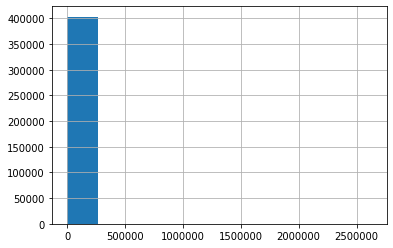

In [10]:
df.streams.hist()

This shows me that the frequency is not normalized and the range appears to be between 0 2-3 million which is a huge, but manageable gap of data.  Let's confirm with some statistical queries.

In [12]:
print(df.streams.min())
print(df.streams.max())
print(df.streams.mode())

0
2629715
0    0
dtype: int64


From here we can see that our min and max frequency are correct with our most common number being 0.  That being said, 0-50 listeners is not a huge difference and so let's see if we can narrow down our data set even further by looking at our top 90th %tile.

In [13]:
df['streams'].quantile(q=.9)

28.0

This seems like a perfect place to start querying our data.  The difference between 0 and 28 streams is not so significant that we will lose context and, 28 v our max is still significant enough that we can use it to predict what makes a successful v nonsuccessful playlist.  Let's create a dataframe based on these paramaters that we can use to visualize some of our hyotheses. 

In [15]:
booleans = []
for number in df.streams:
    if number >= 28:
        booleans.append(True)
    else:
        booleans.append(False)

top_10p = pd.Series(booleans)

top_10p

0         False
1         False
2         False
3         False
4         False
          ...  
403361    False
403362    False
403363    False
403364    False
403365     True
Length: 403366, dtype: bool

In [16]:
top_10p = df.streams >= 28

In [19]:
df2 = df[top_10p]
df2

,playlist_uri,owner,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,...,n_albums,monthly_stream30s,monthly_owner_stream30s,tokens,genre_1,genre_2,genre_3,mood_1,mood_2,mood_3
9,spotify:user:d2663dd02ba0b23da58f0e3c20a9e29f:...,d2663dd02ba0b23da58f0e3c20a9e29f,59,51,2,10,17,12,5,29,...,112,1450,123,"[""reading"", ""music""]",Soundtrack,Classical,Pop,Romantic,Peaceful,Tender
14,spotify:user:9a3580868994077be27d244788d494cd:...,9a3580868994077be27d244788d494cd,28,15,1,1,2,1,1,2,...,205,83,77,"[""sunny"", ""daze""]",Alternative,Indie Rock,Electronica,Brooding,Excited,Sensual
20,spotify:user:838141e861005b6a955cb389c19671a5:...,838141e861005b6a955cb389c19671a5,32,25,2,3,4,3,3,5,...,125,327,253,"[""metalcore"", ""forever""]",Punk,Metal,Rock,Defiant,Urgent,Aggressive
29,spotify:user:spotify:playlist:2XOX0XoKqciyzmpm...,spotify,223,95,28,88,447,0,0,737,...,30,3266,9,"[""new"", ""troubadors""]",Indie Rock,Alternative,Country & Folk,Gritty,Easygoing,Empowering
30,spotify:user:spotify:playlist:6A3BCaAJ8O84lo58...,spotify,49158,31127,4711,30856,116427,131460,17878,382105,...,1,1020043,0,"[""running"", ""mid"", ""tempo"", ""bpm""]",Alternative,Punk,Indie Rock,Excited,Urgent,Empowering
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403325,spotify:user:59740f29634b904c5f9e2c8331cb2cf4:...,59740f29634b904c5f9e2c8331cb2cf4,34,34,1,1,2,0,0,2,...,74,108,62,"[""ayyyyyyyyyy""]",Rap,Alternative,Dance & House,Defiant,Energizing,Aggressive
403336,spotify:user:a0781a2de47beb8bd693f3022f316327:...,a0781a2de47beb8bd693f3022f316327,856,855,3,10,10,5,5,10,...,9,33747,1391,"[""evning"", ""song""]",-,-,-,-,-,-
403349,spotify:user:20137d62d79c8899d689530a5ea7eee2:...,20137d62d79c8899d689530a5ea7eee2,32,26,2,12,38,53,10,113,...,23,557,35,"[""love"", ""open"", ""door""]",Soundtrack,Children's,Pop,Lively,Sophisticated,Empowering
403350,spotify:user:e24f0588a2f7215f7992e584f6f9631f:...,e24f0588a2f7215f7992e584f6f9631f,69,26,1,1,2,2,1,3,...,326,1598,1582,"[""weekend""]",Rock,Country & Folk,Metal,Cool,Energizing,Rowdy


Now that we have our 90th percentile data, let's look at our first hypothesis:

**Regardless of Persona, An increase in the number of unique artists in a playlist (i.e, variety provided), the more successful a playlist will be.**

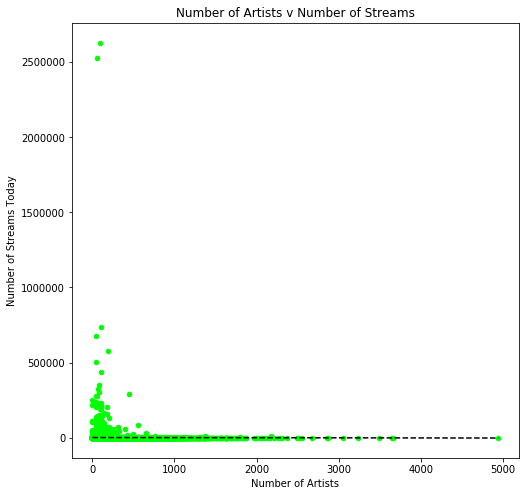

In [20]:
df2 = df[top_10p]
df2 = df2.sort_values('n_artists')
df2.plot(kind = 'scatter', x ='n_artists', y = 'streams',  figsize = [8,8], color = 'lime')
plt.title('Number of Artists v Number of Streams')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Streams Today')


x = df2.n_artists
y = df2.streams
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k--")

plt.show()

As we can see, there is no correlation between the number of artists and the success of a playlist (or number of streams today).  Let's compare this against our dataset as a whole to make sure that our sample size accurately reflects the population as a whole.

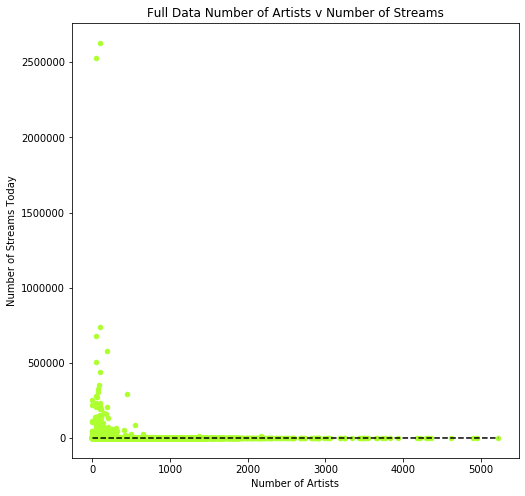

In [21]:
df = df.sort_values('n_artists')
df.plot(kind = 'scatter', x ='n_artists', y = 'streams',  figsize = [8,8], color = 'greenyellow')
plt.title('Full Data Number of Artists v Number of Streams')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Streams Today')


x = df.n_artists
y = df.streams
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k--")

plt.show()

To be sure, let's look at this same hypothesis through the variable monthly active users last month to and this month. 

In [23]:
print(df['mau_both_months'].quantile(q=.9))
print(df['mau_both_months'].mode())

2.0
0    1
dtype: int64


In [25]:
booleans2 = []
for number in df.mau_both_months:
    if number >= 3:
        booleans2.append(True)
    else:
        booleans2.append(False)

top_10pmauboth = pd.Series(booleans2)

top_10pmauboth

0         False
1          True
2         False
3         False
4         False
          ...  
403361    False
403362    False
403363    False
403364    False
403365    False
Length: 403366, dtype: bool

In [26]:
top_10mauboth = df.mau_both_months >= 3
df3 = df[top_10pmauboth]
df3

/Users/blair/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,playlist_uri,owner,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,...,n_albums,monthly_stream30s,monthly_owner_stream30s,tokens,genre_1,genre_2,genre_3,mood_1,mood_2,mood_3
300789,spotify:user:9945a66a76240d8251c46e468f1c46b3:...,9945a66a76240d8251c46e468f1c46b3,22,14,1,2,11,9,1,24,...,1,1035,962,"[""stay""]",Dance & House,Electronica,Pop,Excited,Energizing,Aggressive
35115,spotify:user:19b7eeca26f089c8e2f1bbb367960703:...,19b7eeca26f089c8e2f1bbb367960703,0,0,0,1,2,1,1,2,...,1,2,1,"[""kings"", ""kaleidoscope"", ""live"", ""color""]",-,-,-,-,-,-
184827,spotify:user:8110e9d7e0ae489cc40b9592493b4d59:...,8110e9d7e0ae489cc40b9592493b4d59,0,0,0,1,2,1,1,2,...,2,26,23,"[""cafe"", ""quijano""]",Latin,-,-,Easygoing,Fiery,Yearning
344169,spotify:user:c3ae3f2ee54002ac7afe973936db6280:...,c3ae3f2ee54002ac7afe973936db6280,0,0,0,1,2,1,1,2,...,1,82,70,"[""trendychill""]",Electronica,Dance & House,Indie Rock,Sensual,Energizing,Brooding
184905,spotify:user:a79aac7891bd4263bedc1d810e08f739:...,a79aac7891bd4263bedc1d810e08f739,0,0,0,0,3,0,0,3,...,1,158,34,"[""music"", ""test""]",Indie Rock,Alternative,Pop,Defiant,Empowering,Yearning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24377,spotify:user:d8a1266876974468823f6eba39f6a71b:...,d8a1266876974468823f6eba39f6a71b,9,5,1,4,13,14,3,29,...,1140,98,15,"[""summer"", ""love""]",Rock,Country & Folk,Pop,Other,Gritty,Empowering
201402,spotify:user:e929e4d8e46f2c5ac164d4bcdc70e535:...,e929e4d8e46f2c5ac164d4bcdc70e535,0,0,0,1,2,2,1,4,...,2038,916,915,"[""year"", ""zen""]",Indie Rock,Pop,Alternative,Yearning,Empowering,Brooding
74371,spotify:user:607ca9012da3776296d68e78b474e5f0:...,607ca9012da3776296d68e78b474e5f0,95,10,1,2,8,8,1,34,...,2548,354,338,"[""breakup"", ""songs""]",Pop,Country & Folk,R&B,Empowering,Sensual,Yearning
358165,spotify:user:689a142765a0a3f2e4725498fa0ee085:...,689a142765a0a3f2e4725498fa0ee085,12,2,1,3,5,3,2,6,...,2522,108,30,"[""new"", ""releases"", ""best""]",Alternative,Indie Rock,Pop,Brooding,Excited,Yearning


/Users/blair/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


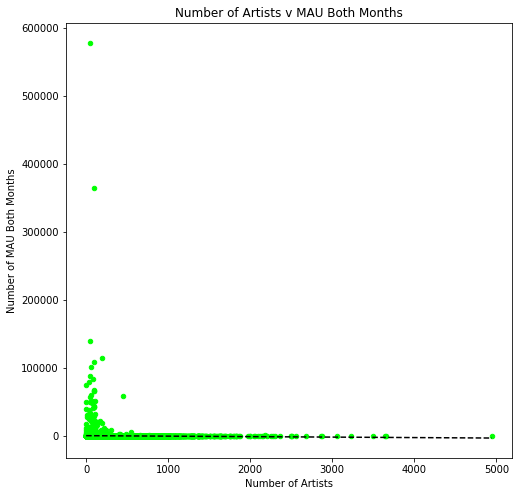

In [27]:
df2 = df[top_10p]
df2 = df2.sort_values('n_artists')
df2.plot(kind = 'scatter', x ='n_artists', y = 'mau_both_months',  figsize = [8,8], color = 'lime')
plt.title('Number of Artists v MAU Both Months')
plt.xlabel('Number of Artists')
plt.ylabel('Number of MAU Both Months')


x = df2.n_artists
y = df2.streams
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k--")

plt.show()

This supports the conclusion that my hypothesis was incorrect and that there is no correlation between the number of distinct artists and the sucess of a playlist.  I will move on to the **number of songs** next.

My next hypothesis: **The more songs in a playlist, the more successful it will be** The reason for this is that I'm looking to understand the greatest number of streams, monthly active users, weekly active users, etc. and I would predict that the more "one stop" a playlist is, the more likely it is to be succesful and popular today and in the future. 

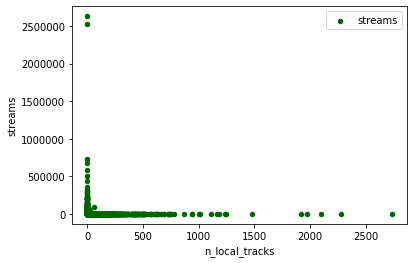

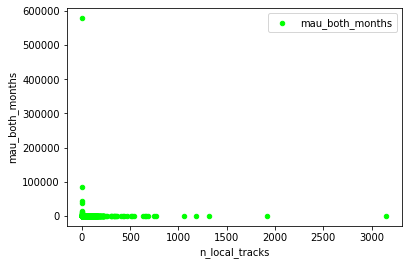

In [32]:
ax = df2.plot(kind = 'scatter', x = 'n_local_tracks', y = 'streams', color = 'darkgreen', label = 'streams')
df3.plot(kind = 'scatter', x = 'n_local_tracks', y = 'mau_both_months', color = 'lime', label = 'mau_both_months')

It's clear that as our heatmap shows, there is no correlation between the number of songs on a playlist and how successful it is (or how many streams, monthly active users it has)

The final continuous datapoint that I want to check is the number of skippers.  Again, according to our heatmap there is an almost perfect correlation (.94 & .95) between skippers and the variables that we can use to measure success. This would make sense as, as you increase the number of streams and users, you'd imagine that the likelihood that their listening habits over the entirety of their listening habits, would also apply to the likelihood that they'd skip songs within a playlist, regardless of how successful it is. Let's visualize to confirm with our full dataset, and the two that we've created showing our top users and sterams (our more successful playlists by 90th percentile exclusion).

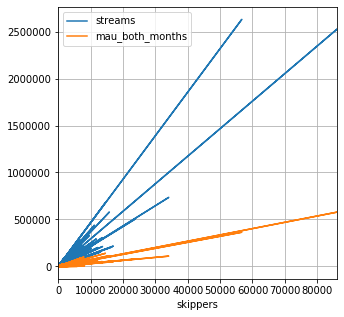

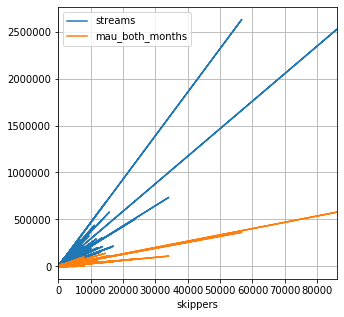

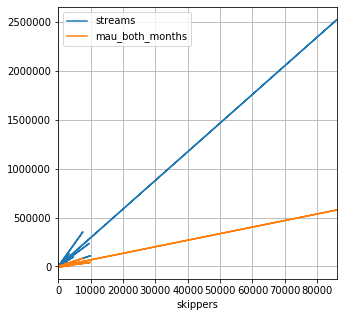

In [31]:
df.plot(x ='skippers', y=['streams', 'mau_both_months'], figsize=(5,5), grid=True)
df2.plot(x ='skippers', y=['streams', 'mau_both_months'], figsize=(5,5), grid=True)
df3.plot(x ='skippers', y=['streams', 'mau_both_months'], figsize=(5,5), grid=True)

For the hypotheses regarding the categorical data from this dataframe, I'll be using the excel doc found in this repository.